In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import openMindednessFunctions as omf
import seaborn as sns

In [3]:
hyp = pd.read_csv('OMdata_h.csv')
net = pd.read_csv('datasets/in/OMdata.csv')

In [4]:
hyp = hyp.drop(labels='Unnamed: 0', axis='columns')
net = net.drop(labels='Unnamed: 0', axis='columns')

In [5]:
len(hyp)

2108

In [6]:
len(net)

2108

In [6]:
import pickle

datasets = ['politics', 'minority', 'guncontrol']
dictionaries = {}

for dataset in datasets:
    filename = f"datasets/in/{dataset}_t2node2opinions.pickle"
    with open(filename, 'rb') as file:
        dictionary = pickle.load(file)
        dictionaries[dataset] = dictionary

# Access the dictionaries using dictionaries['politics'], dictionaries['minority'], dictionaries['guncontrol']
for dataset in datasets:
    nodeset = set()
    for t in dictionaries[dataset].keys():
        for node in dictionaries[dataset][t].keys():
            nodeset.add(node)
    print(len(nodeset))

4509
5541
4992


# Plots for politics dataset

In [2]:
import os
import re
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('mode.chained_assignment', None)

In [13]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.size'] = 20
rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'
rcParams['figure.figsize'] = (25,20)

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

navy = (56 / 256, 74 / 256, 143 / 256)
teal = (106 / 256, 197 / 256, 179 / 256)
pink = [199 / 255, 99 / 255, 150 / 255]
rcParams['axes.prop_cycle'] = cycler(color=['tab:blue', 'tab:green', 'tab:red'])

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 45
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4
rcParams['axes.titlecolor'] = 'black'
rcParams['axes.titlesize'] = 45
rcParams['axes.labelcolor'] = 'black'  

rcParams['xtick.color'] = 'black'
rcParams['ytick.color'] = 'black'
rcParams['xtick.major.width'] = 5
rcParams['ytick.major.width'] = 5
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 40

rcParams['lines.linewidth'] = 5
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'white'
rcParams['grid.linewidth'] = 0.1

In [9]:
hyp = hyp.rename(columns={'date':'timestamp'})
# net = net.rename(columns={'date':'timestamp'})

In [10]:
# import seaborn as sns
# palette = {
#     'Democrat': 'tab:blue',
#     'Moderate': 'tab:green',
#     'Republican': 'tab:red',
# }
# # sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})

# for dataset in sorted(hyp.dataset.unique()):
#     print(dataset)
#     data = hyp[hyp['dataset']==dataset]
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharey=True)
#     i = 0
#     j = 0
#     for timestamp in list(data.timestamp.unique()):
#         tmp = data[data['timestamp']==timestamp]
#         g = sns.histplot(data=tmp, x='opt', hue='orientation', palette=palette, ax=axes[i, j], alpha=0.2, stat='percent', common_norm=False, kde=True, line_kws={'linewidth':5})
#         g.set_ylabel("% Users", fontsize = 15)
#         g.set_xlabel("Opinion", fontsize = 15)
#     #     g.set_title(f'{labels[i,j]}', fontsize = 15)
#         g.set_xlim(-0.1, 1.0)
#     #     g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
#         # yticklabels = g.get_yticks()
#         # g.set_yticklabels(labels = yticklabels, fontsize=15)
#         plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
#         plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
#         plt.subplots_adjust(hspace=0.5)
#         if j < 1 or i > 0:
#             g.legend_.remove()
#         else:
#             axes[i,j].legend_.set_title("Leaning")
#         j += 1
#         if j % 2 == 0:
#             i+=1
#             j = 0
#     plt.suptitle(dataset.capitalize())
#     plt.show()
#     plt.close()

In [11]:
datan = net[net['dataset'] == 'politics']
len(datan)

655

In [12]:
datan = net[net['dataset'] == 'guncontrol']
len(datan)

614

In [13]:
datan = net[net['dataset'] == 'minority']
len(datan)

839

In [14]:
net.columns

Index(['timestamp', 'node', 'dataset', 'opt', 'opt1', 'neighbors', 'opChange',
       'homophily', 'orientation', 'neighborsOps', 'error', 'estOp',
       'openMindedness', 'nactiveint', 'orientation-1', 'date'],
      dtype='object')

In [15]:
hyp.columns

Index(['node', 'dataset', 'opt', 'opt1', 'neighbors', 'opChange', 'homophily',
       'orientation', 'neighborsOps', 'error', 'estOp', 'openMindedness',
       'nactiveint', 'timestamp'],
      dtype='object')

hello
hello
hello


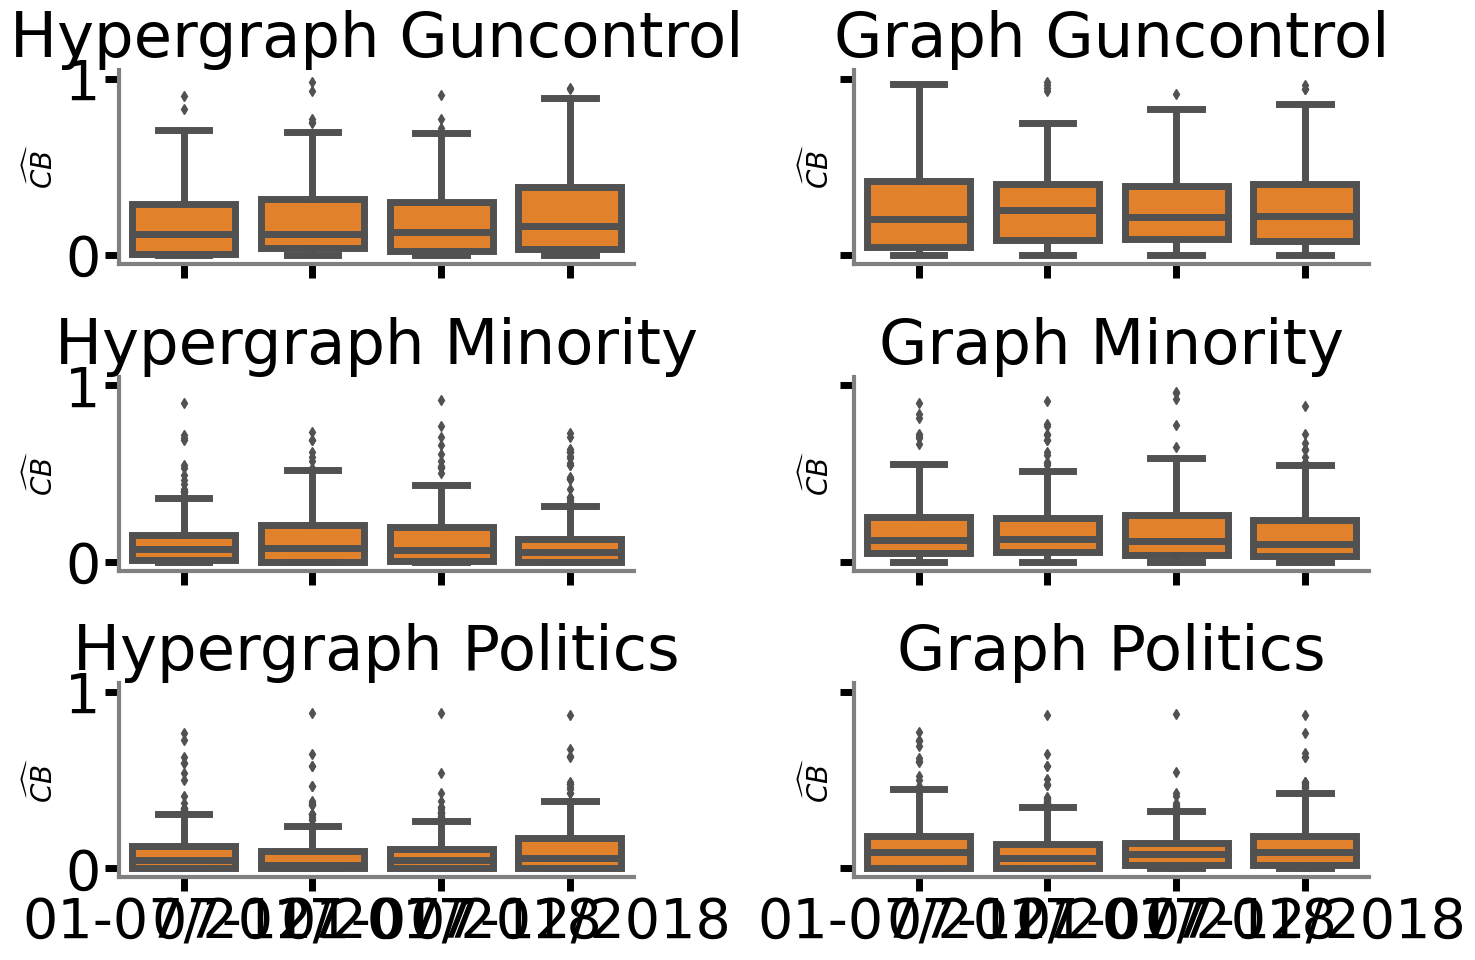

In [16]:
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(15,10))
for i, dataset in enumerate(sorted(net.dataset.unique())):
    datah = hyp[hyp['dataset'] == dataset]
    datan = net[net['dataset'] == dataset]
    # sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
    ax[i,0] = sns.boxplot(x="timestamp", y="openMindedness", color='tab:orange', data=datah, ax=ax[i, 0], showfliers=True)
    print('hello')
    ax[i,1] = sns.boxplot(x="timestamp", y="openMindedness", color='tab:orange', data=datan, ax=ax[i, 1], showfliers=True)
    ax[i,0].set_xlabel("")
    ax[i,1].set_xlabel("")
    ax[i,0].set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    ax[i,1].set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    ax[i,0].set_xticks(ticks=[0, 1, 2, 3])
    ax[i,1].set_xticks(ticks=[0, 1, 2, 3])
    ax[i,0].set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '07-12/2018'], fontdict={'horizontalalignment': 'center'})
    ax[i,1].set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '07-12/2018'], fontdict={'horizontalalignment': 'center'})
    ax[i,0].set_ylim(-0.05, 1.05)
    ax[i,1].set_ylim(-0.05, 1.05)
    ax[i,0].set_title(f'Hypergraph {dataset.capitalize()}')
    ax[i,1].set_title(f'Graph {dataset.capitalize()}')

# plt.suptitle("Overall Open-Mindedness Distributions")
plt.tight_layout()
plt.show()
plt.close()
# plt.legend(loc='upper right', title='Leaning')
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'left'})
# g.set_xlim(left=-1.5, right=19.5)

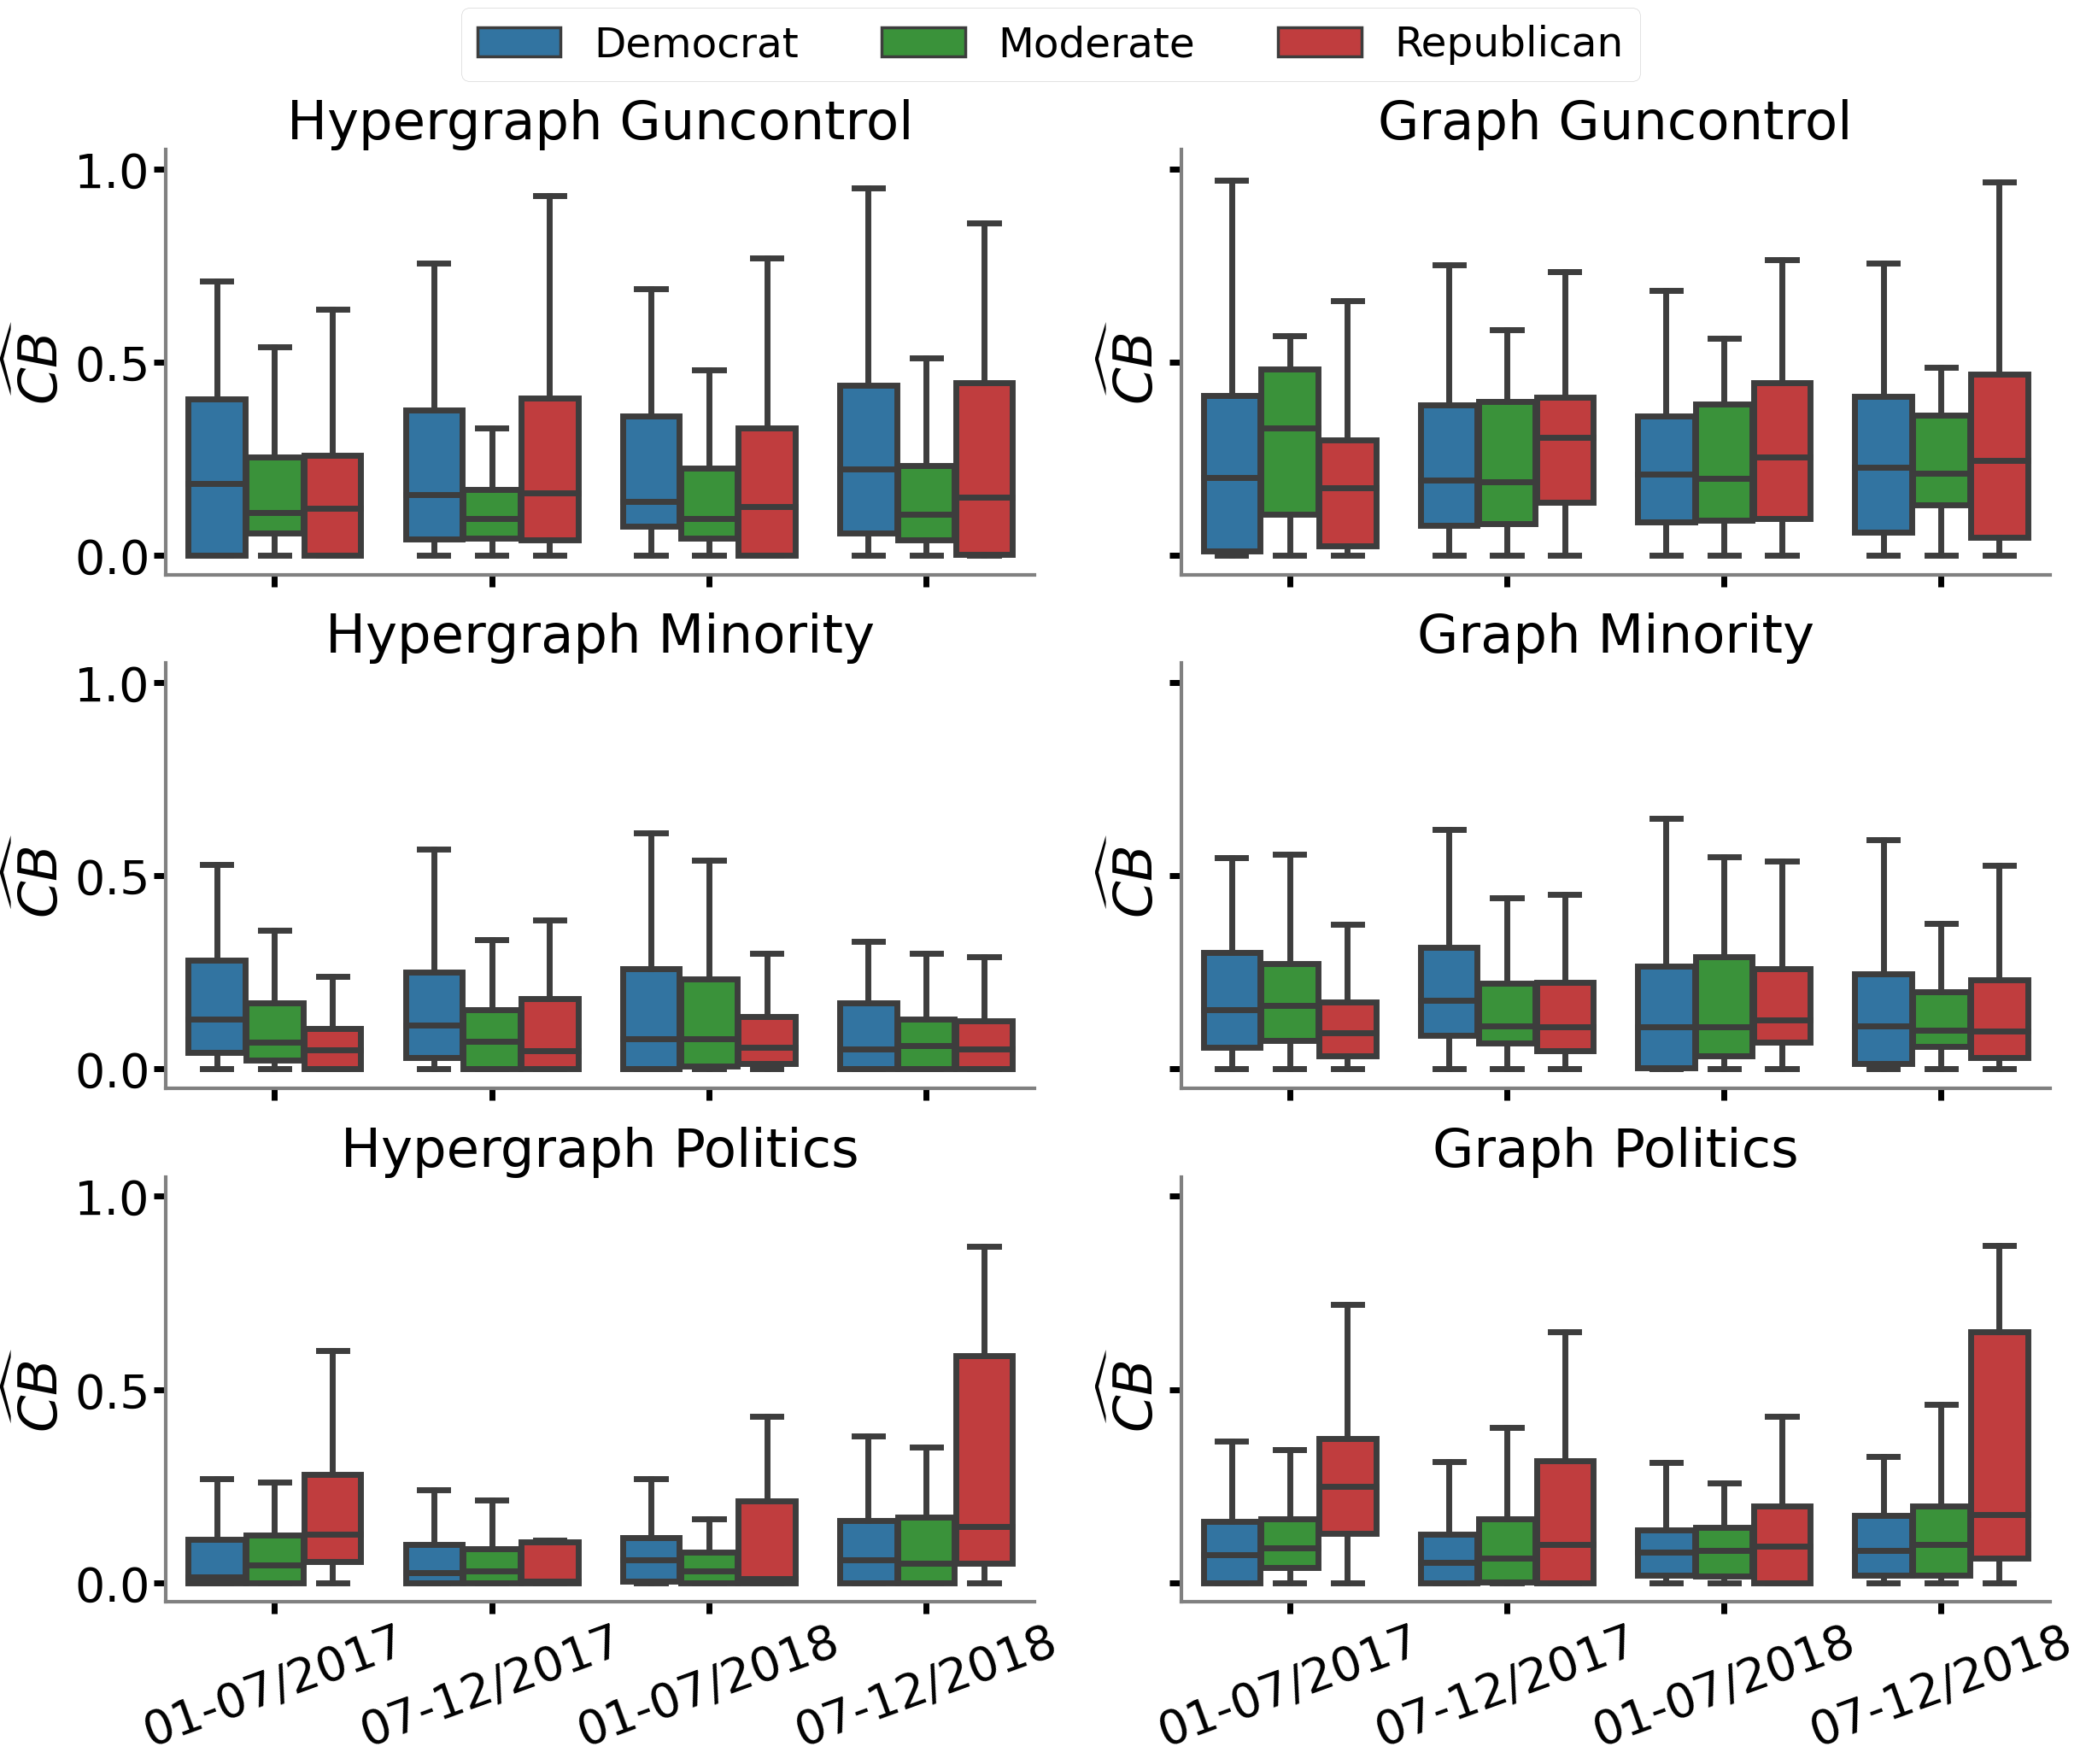

In [26]:
import seaborn as sns
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(25,20))
for i, dataset in enumerate(sorted(hyp.dataset.unique())):
    aaa = hyp[hyp['dataset'] == dataset]
    bbb = net[net['dataset'] == dataset]
    # sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
    sns.boxplot(x="timestamp", y="openMindedness", hue = 'orientation', palette=palette, hue_order = ['Democrat', 'Moderate', 'Republican'], data=aaa, ax=ax[i, 0], showfliers=False)
    sns.boxplot(x="timestamp", y="openMindedness",  hue = 'orientation', palette=palette, hue_order = ['Democrat', 'Moderate', 'Republican'], data=bbb, ax=ax[i, 1], showfliers=False)
    ax[i,0].set_xlabel("")
    ax[i,1].set_xlabel("")
    ax[i,0].set_ylabel(r"$\widehat{CB}$")
    ax[i,1].set_ylabel(r"$\widehat{CB}$")
    ax[i,0].set_xticks(ticks=[0, 1, 2, 3])
    ax[i,1].set_xticks(ticks=[0, 1, 2, 3])
    ax[i,0].set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '07-12/2018'], fontdict={'horizontalalignment': 'center'}, rotation=20)
    ax[i,1].set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '07-12/2018'], fontdict={'horizontalalignment': 'center'}, rotation=20)
    ax[i,0].set_ylim(-0.05, 1.05)
    ax[i,1].set_ylim(-0.05, 1.05)
    ax[i,0].set_title(f'Hypergraph {dataset.capitalize()}')
    ax[i,1].set_title(f'Graph {dataset.capitalize()}')
    ax[i,0].legend_.remove()
    ax[i,1].legend_.remove()
# ax[0,1].legend()
# ax[0,1].legend_.set_title("Leaning")
# ax[0,1].legend(loc='upper right', labelcolor='black')
# Legend on a single line with three columns at the upper center
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, labelcolor='black', fontsize=35)

#     g.set_title(dataset.capitalize())
# plt.suptitle("Overall Open-Mindedness Distributions")
plt.tight_layout()
plt.show()
plt.close()
# plt.legend(loc='upper right', title='Leaning')
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'left'})
# g.set_xlim(left=-1.5, right=19.5)

<Axes: xlabel='your_variable', ylabel='Density'>

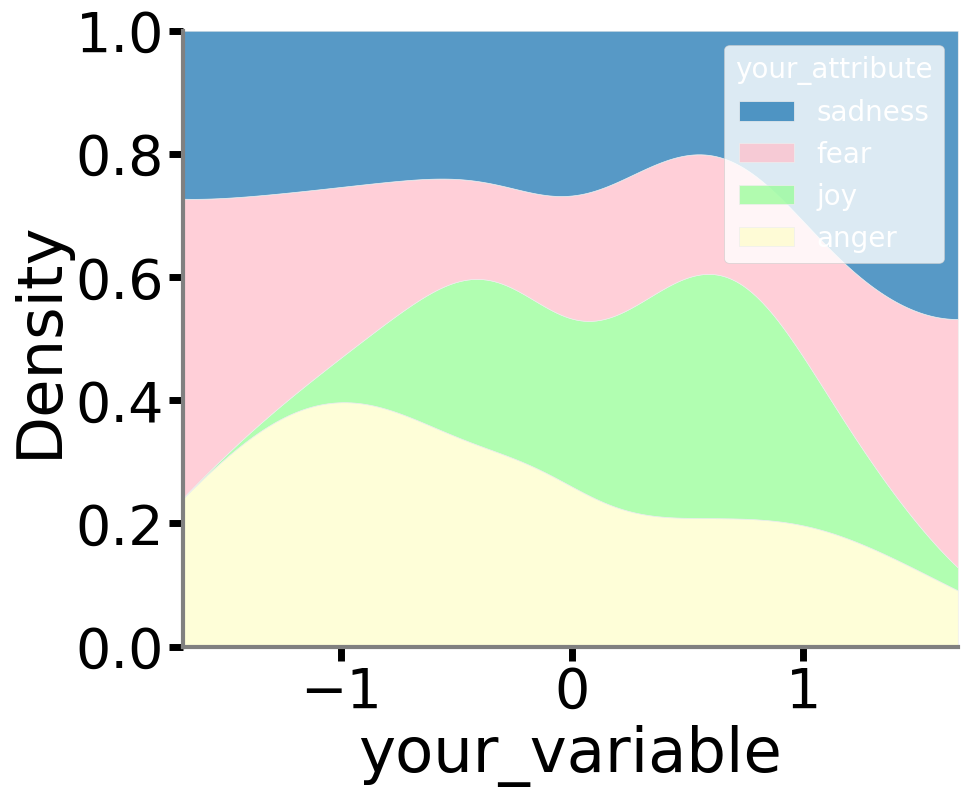

In [14]:
n = 100  # Number of data points
np.random.seed(0)  # Set random seed for reproducibility
data = pd.DataFrame({
    'your_variable': np.random.uniform(-1, 1, n),  # Generate random real values in the range -1 and 1
    'your_attribute': np.random.choice(['anger', 'sadness', 'fear', 'joy'], n)  # Sample from the specified discrete attribute values
})

# Plot the data using seaborn
sns.kdeplot(data=data, x="your_variable", hue="your_attribute", multiple="fill")